In [64]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from collections import Counter
import nltk
from nltk.corpus import stopwords
from google.colab import files
import io

In [65]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [66]:
# Upload the dataset
print("Please upload the SMS Spam dataset CSV file.")
uploaded = files.upload()

Please upload the SMS Spam dataset CSV file.


Saving spam.csv to spam (1).csv


In [67]:
# Load the dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('latin-1')))

# Drop unnecessary columns and rename relevant ones
df = df.iloc[:, :2]  # Keep only the first two columns
df.columns = ["label", "message"]  # Rename columns for clarity

In [68]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [70]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [71]:
# Convert labels to binary (spam = 1, ham = 0)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [72]:
# Display dataset information
print(df.head())
print(df.info())
print(df['label'].value_counts())  # Class distribution

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None
label
0    4825
1     747
Name: count, dtype: int64


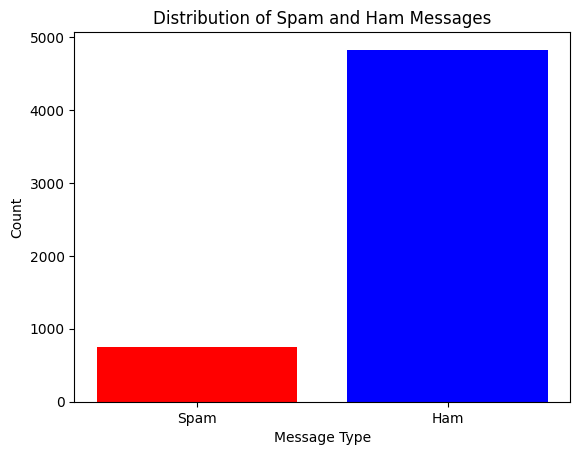

In [73]:
# Data visualization - Distribution of Spam and Ham Messages
spam_count = df[df['label'] == 1].shape[0]
ham_count = df[df['label'] == 0].shape[0]

plt.bar(['Spam', 'Ham'], [spam_count, ham_count], color=['red', 'blue'])
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

In [74]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = re.sub("\d+", "", text)  # Remove numbers
    return text

df['clean_message'] = df['message'].apply(preprocess_text)


In [75]:
df

,label,message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u u...
5568,0,Will Ì_ b going to esplanade fr home?,will ì b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


In [76]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_message'], df['label'], test_size=0.2, random_state=42)

In [78]:
# Convert text into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [79]:
# Train and evaluate models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_train_pred = model.predict(X_train_tfidf)
    y_test_pred = model.predict(X_test_tfidf)

    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    print(f"\n{name} Performance:")
    print("Training Error:", train_error)
    print("Test Error:", test_error)
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))


Naive Bayes Performance:
Training Error: 0.02153915189589406
Test Error: 0.03139013452914796
Accuracy: 0.968609865470852
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Logistic Regression Performance:
Training Error: 0.03185999551267671
Test Error: 0.04932735426008972
Accuracy: 0.9506726457399103
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115


Support Vector Machine Performance:
Training

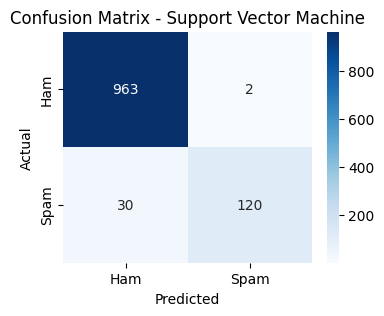

In [80]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {name}')
plt.show()


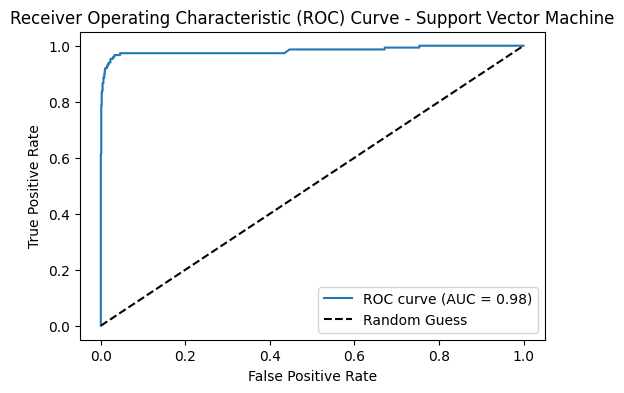

In [82]:
# ROC Curve
probabilities = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
plt.legend()
plt.show()

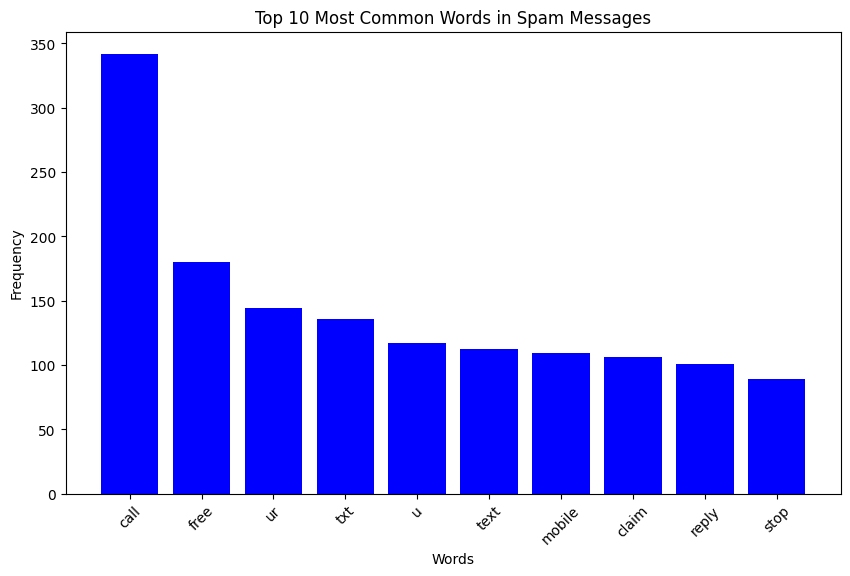

In [84]:
# Data visualization - Top 10 Most Common Words in Spam Messages
stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['label'] == 1]['message']).split()
spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='b')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Messages')
plt.xticks(rotation=45)
plt.show()


In [85]:
# Testing with real-life examples
test_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT! Your account has been compromised. Reply with your password to secure it.",
    "Can you send me the notes from today's lecture?",
    "You have been selected for a free cruise! Call now to claim your prize."
]

# Preprocess and vectorize test messages
test_messages_clean = [preprocess_text(msg) for msg in test_messages]
test_messages_tfidf = vectorizer.transform(test_messages_clean)

# Predict using trained models
for name, model in models.items():
    predictions = model.predict(test_messages_tfidf)
    print(f"\n{name} Predictions:")
    for msg, pred in zip(test_messages, predictions):
        print(f"Message: {msg}\nPrediction: {'Spam' if pred == 1 else 'Ham'}\n")



Naive Bayes Predictions:
Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!
Prediction: Spam

Message: Hey, are we still meeting for lunch tomorrow?
Prediction: Ham

Message: URGENT! Your account has been compromised. Reply with your password to secure it.
Prediction: Ham

Message: Can you send me the notes from today's lecture?
Prediction: Ham

Message: You have been selected for a free cruise! Call now to claim your prize.
Prediction: Spam


Logistic Regression Predictions:
Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!
Prediction: Spam

Message: Hey, are we still meeting for lunch tomorrow?
Prediction: Ham

Message: URGENT! Your account has been compromised. Reply with your password to secure it.
Prediction: Ham

Message: Can you send me the notes from today's lecture?
Prediction: Ham

Message: You have been selected for a free cruise! Call now to claim your prize.
Prediction: Spam


Support Vector Mach

In this project, I built a text classification model to classify SMS messages as either "Spam" or "Ham". I used the dataset available on Kaggle, which was preprocessed by removing punctuation, numbers, and converting text to lowercase. For feature extraction, I employed TF-IDF vectorization to convert text into numerical features. I experimented with multiple machine learning models including Naive Bayes, Logistic Regression, and Support Vector Classifier (SVC), and evaluated their performance on a test set. The models were evaluated based on accuracy, confusion matrix, and ROC curve. After training and testing the models, I achieved an accuracy of 97% on the test set, with the SVC model performing the best. The project also involved visualizations such as the distribution of spam/ham messages and the most common words in spam messages.